# Topics

## 1. Image Manipulation



## On your home machines, do
\> pip install scikit-image

## An image in Python is no more or less than a 2D numpy array!

<type 'numpy.ndarray'> (512, 512, 4) uint8


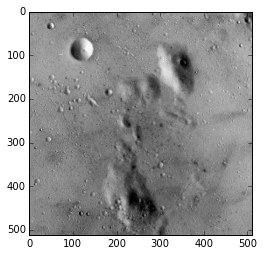

In [2]:
%matplotlib inline
'''

A RGBA images -- with four channels.  The last one, the "alpha-channel", allows for transparency, 

'''


import matplotlib.image as mpimg
import matplotlib.pyplot as plt

moon_im=mpimg.imread('moon.gif')
print type(moon_im), moon_im.shape, moon_im.dtype
plt.imshow(moon_im)

plt.show()

[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


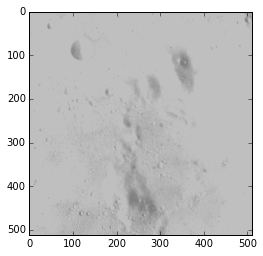

In [24]:
from copy import copy
print moon_im[:5,:5, 3]
moon_copy = copy(moon_im)
moon_copy[:,:,3] = 127

plt.imshow(moon_copy)
plt.show()

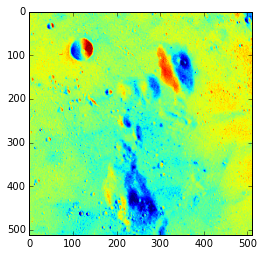

In [21]:
'''
Let's pick one channel, say R

Shown in false color

blue is high, red is low

'''

moon = moon_im[:, :, 0]
plt.imshow(moon)
plt.show()

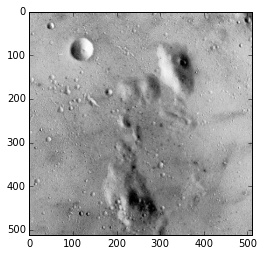

In [9]:
import matplotlib.cm as cm
plt.imshow(moon, cmap = cm.Greys_r)
plt.show()


<type 'numpy.ndarray'> (512, 512) uint8


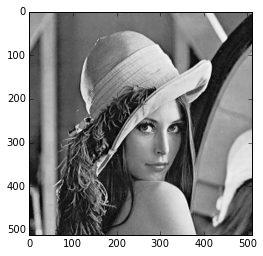

In [10]:
lena = mpimg.imread('lena512.jpg')
print type(lena), lena.shape, lena.dtype
plt.imshow(lena,  cmap = cm.Greys_r)
plt.show()

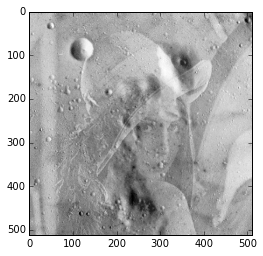

In [29]:
'''Blending'''
# To avoid saturation (just as for sound)
fac = 0.25

blend = fac*lena + (1-fac)*moon
plt.imshow(blend,  cmap = cm.Greys_r)
plt.show()

In [41]:
import numpy as np

x = np.arange(10)
x_new = np.roll(x, 4)
print x_new

[6 7 8 9 0 1 2 3 4 5]


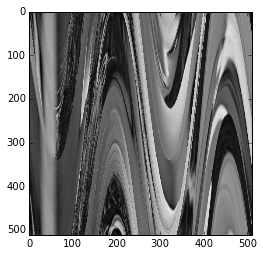

In [51]:
A = lena.shape[0] / 3.0
w = 2.0 / lena.shape[1]

shift = lambda x: A * np.sin(2.0*np.pi*x*w)

for i in range(lena.shape[0]):
    lena[:,i] = np.roll(lena[:,i], int(shift(i)))

plt.imshow(lena, cmap=plt.cm.gray)
plt.show()

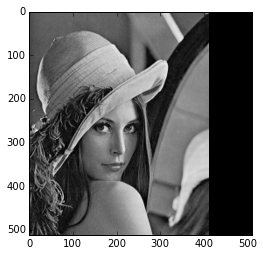

In [88]:
from skimage.transform import warp
def shift_left(xy):
    xy[:, 0] += 100
    return xy
    
lena = mpimg.imread('lena512.jpg')
lena_shift = warp(lena, shift_left)
plt.imshow(lena_shift, cmap=plt.cm.gray)
plt.show()

## Breakout: Simulate Fish Eye Lens:
## r = 0.8 * exp(r^(1/2.1) / 1.8)
source: http://wiki.panotools.org/Fisheye_Projection

In [87]:
lena = mpimg.imread('lena512.jpg')
from skimage.transform import warp
def fish_eye(xy):
    ij = 0
    for i in xy:
          ij = i
    '''
    x = xy[:, 0]
    y = xy[:, :]
    r = ((x**2) + (y**2))**(1/2)
    r = 0.8 * np.exp(r^(1/2.1) / 1.8)
    xy[:,0] = ((r**2) + (y**2))**(1/2)
    xy[:,0] = ((r**2) + (y**2))**(1/2)
    '''
    return xy

#newR = 0.8 * exp(r^(1/2.1) / 1.8)
'''
fish_shift = warp(lena, fish_eye)
plt.imshow(lena_shift, cmap=plt.cm.gray)
plt.show()
'''
fish_shift = warp(lena, fish_eye)

2
